### Variable star lightcurves

Because of the presence of flux in the reference image, alerts for variable stars require additional processing to get appropriate photometry.

In [1]:
%matplotlib inline
import os
import io
import gzip
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from avro.datafile import DataFileReader, DataFileWriter
from avro.io import DatumReader, DatumWriter
import fastavro

from astropy.time import Time
from astropy.io import fits
import aplpy


/Users/ebellm/anaconda3/envs/zads/lib/python3.6/site-packages/mpl_toolkits/axes_grid/__init__.py:12: MatplotlibDeprecationWarning: 
The mpl_toolkits.axes_grid module was deprecated in Matplotlib 2.1 and will be removed two minor releases later. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist, which provide the same functionality instead.
  obj_type='module')


### Read in an example

In [2]:
fname = '../../ztf-avro-alert/data/2019_01_10_739260766315010006.avro'

In [3]:
with open(fname,'rb') as f:
    freader = fastavro.reader(f)
    schema = freader.schema

    for packet in freader:
        print(packet.keys())

dict_keys(['schemavsn', 'publisher', 'objectId', 'candid', 'candidate', 'prv_candidates', 'cutoutScience', 'cutoutTemplate', 'cutoutDifference'])


/Users/ebellm/anaconda3/envs/zads/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: The 'schema' attribute is deprecated. Please use 'writer_schema'
  This is separate from the ipykernel package so we can avoid doing imports until


In [4]:
packet['objectId']

'ZTF17aaacxxf'

In [5]:
def make_dataframe(packet):
    df = pd.DataFrame(packet['candidate'], index=[0])
    df_prv = pd.DataFrame(packet['prv_candidates'])
    return pd.concat([df,df_prv], ignore_index=True)

In [6]:
dflc = make_dataframe(packet)
dflc

/Users/ebellm/anaconda3/envs/zads/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  after removing the cwd from sys.path.


,aimage,aimagerat,bimage,bimagerat,candid,chinr,chipsf,classtar,clrcoeff,clrcounc,...,sumrat,szmag1,szmag2,szmag3,tblid,tooflag,xpos,ypos,zpclrcov,zpmed
0,0.998,0.174476,0.931,0.162762,7.392608e+17,0.744,332.435577,0.987,0.100796,0.000005,...,1.000000,12.118,17.686001,-999.0,6.0,0.0,2469.456543,2918.465332,-0.000005,26.25
1,1.495,0.535842,1.272,0.455914,7.102434e+17,0.439,2.326950,0.843,-0.097147,0.000013,...,1.000000,NaN,NaN,NaN,36.0,NaN,2455.790039,2934.879883,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.106160,0.000005,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.789,0.764530,1.510,0.645299,7.112353e+17,0.439,3.663970,0.717,-0.110586,0.000016,...,0.894623,NaN,NaN,NaN,27.0,NaN,2484.040039,2900.300049,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.083136,0.000005,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,0.749,0.318723,0.546,0.232340,7.123000e+17,0.439,3.043170,0.848,-0.043134,0.000014,...,0.957562,NaN,NaN,NaN,15.0,NaN,2488.540039,2928.129883,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.097187,0.000007,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.092626,0.000004,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.054421,0.000011,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1.014,0.761164,0.974,0.731138,7.172563e+17,0.744,19.189501,0.998,0.101342,0.000018,...,1.000000,NaN,NaN,NaN,21.0,NaN,2491.110107,2914.949951,NaN,NaN


In [7]:
dflc.columns.tolist()

['aimage',
 'aimagerat',
 'bimage',
 'bimagerat',
 'candid',
 'chinr',
 'chipsf',
 'classtar',
 'clrcoeff',
 'clrcounc',
 'clrmed',
 'clrrms',
 'dec',
 'decnr',
 'diffmaglim',
 'distnr',
 'distpsnr1',
 'distpsnr2',
 'distpsnr3',
 'dsdiff',
 'dsnrms',
 'elong',
 'exptime',
 'fid',
 'field',
 'fwhm',
 'isdiffpos',
 'jd',
 'jdendhist',
 'jdendref',
 'jdstarthist',
 'jdstartref',
 'magap',
 'magapbig',
 'magdiff',
 'magfromlim',
 'maggaia',
 'maggaiabright',
 'magnr',
 'magpsf',
 'magzpsci',
 'magzpscirms',
 'magzpsciunc',
 'mindtoedge',
 'nbad',
 'ncovhist',
 'ndethist',
 'neargaia',
 'neargaiabright',
 'nframesref',
 'nid',
 'nmatches',
 'nmtchps',
 'nneg',
 'objectidps1',
 'objectidps2',
 'objectidps3',
 'pdiffimfilename',
 'pid',
 'programid',
 'programpi',
 'ra',
 'ranr',
 'rb',
 'rbversion',
 'rcid',
 'rfid',
 'scorr',
 'seeratio',
 'sgmag1',
 'sgmag2',
 'sgmag3',
 'sgscore1',
 'sgscore2',
 'sgscore3',
 'sharpnr',
 'sigmagap',
 'sigmagapbig',
 'sigmagnr',
 'sigmapsf',
 'simag1',
 'si

Let's look at the nearest PS1 sourse to determine if it's coincident and stellar:

In [8]:
dflc.loc[0,['distpsnr1','sgscore1']]

distpsnr1    0.250741
sgscore1     0.990625
Name: 0, dtype: object

The nearest PS1 object has a high star-galaxy score and is less than 1.5" away, so we will identify this as a variable star.  Let's make a small configurable function:

In [9]:
def is_star(dflc, match_radius_arcsec=1.5, star_galaxy_threshold = 0.4):
    return (dflc.loc[0,'distpsnr1'] < match_radius_arcsec) & (dflc.loc[0,'sgscore1'] > star_galaxy_threshold)

In [10]:
is_star(dflc)

True

We should also confirm that the nearest reference source from ZTF is also coincident:

In [11]:
dflc['distnr']

0     0.271219
1     0.874045
2          NaN
3     1.508070
4          NaN
5     0.638425
6          NaN
7          NaN
8          NaN
9     0.307295
10         NaN
11    0.381796
12    0.522444
13    0.341836
14    0.206159
15    0.155916
16    0.095549
17    0.223322
18    0.101578
19    0.226681
20    0.120045
21    0.055269
22    0.120098
23    0.199200
24    0.172423
25    0.221493
26    0.116298
27    0.042026
28    0.074227
Name: distnr, dtype: float64

In [12]:
dflc[['magnr','sigmagnr']]

,magnr,sigmagnr
0,14.318999,0.016
1,16.747000,0.016
2,NaN,NaN
3,16.747000,0.016
4,NaN,NaN
5,16.747000,0.016
6,NaN,NaN
7,NaN,NaN
8,NaN,NaN
9,14.319000,0.016


There's no magnitude of the reference source when we only have upper limits--so we have to infer it using the other observations, if possible.  `magnr` will depend on the field, chip x quadrant (`rcid`), and filter.

In [13]:
grp = dflc.groupby(['fid','field','rcid'])
impute_magnr = grp['magnr'].agg(lambda x: np.median(x[np.isfinite(x)]))
print(impute_magnr)
impute_sigmagnr = grp['sigmagnr'].agg(lambda x: np.median(x[np.isfinite(x)]))
print(impute_sigmagnr)

fid  field  rcid
1    658    63      16.747
2    658    63      14.319
Name: magnr, dtype: float64
fid  field  rcid
1    658    63      0.016
2    658    63      0.016
Name: sigmagnr, dtype: float64


In [14]:
 dflc[['fid','field','rcid']]

,fid,field,rcid
0,2,658,63
1,1,658,63
2,2,658,63
3,1,658,63
4,2,658,63
5,1,658,63
6,2,658,63
7,2,658,63
8,1,658,63
9,2,658,63


(Note that prior to 2018-11-12, nondetections don't have field and rcid in the alert packet, which makes inferring upper limits more diffcult.)

Now assign these imputed values to the observations with upper limits

In [15]:
for idx, grpi in grp:
    w = np.isnan(grpi['magnr'])
    w2 = grpi[w].index
    dflc.loc[w2,'magnr'] = impute_magnr[idx]
    dflc.loc[w2,'sigmagnr'] = impute_sigmagnr[idx]

In [16]:
dflc[['magnr','sigmagnr']]

,magnr,sigmagnr
0,14.318999,0.016
1,16.747000,0.016
2,14.319000,0.016
3,16.747000,0.016
4,14.319000,0.016
5,16.747000,0.016
6,14.319000,0.016
7,14.319000,0.016
8,16.747000,0.016
9,14.319000,0.016


In [17]:
dflc['isdiffpos']

0        f
1        t
2     None
3        t
4     None
5        t
6     None
7     None
8     None
9        f
10    None
11       f
12       f
13       f
14       f
15       f
16       f
17       f
18       f
19       f
20       f
21       f
22       f
23       f
24       f
25       f
26       f
27       f
28       0
Name: isdiffpos, dtype: object

Now convert `isdiffpos` into a +/- 1 value.  `isdiffpos` is `None` for nondetections, but that won't be an issue when computing the sign

In [18]:
dflc['sign'] = 2* (dflc['isdiffpos'] == 't') - 1
dflc['sign']

0    -1
1     1
2    -1
3     1
4    -1
5     1
6    -1
7    -1
8    -1
9    -1
10   -1
11   -1
12   -1
13   -1
14   -1
15   -1
16   -1
17   -1
18   -1
19   -1
20   -1
21   -1
22   -1
23   -1
24   -1
25   -1
26   -1
27   -1
28   -1
Name: sign, dtype: int64

Confirm we have zeropoints.  TODO: use `magzpsciunc` below

In [19]:
dflc[['magzpsci','magzpsciunc']]

,magzpsci,magzpsciunc
0,26.161135,0.000004
1,26.276501,0.000011
2,26.150400,0.000004
3,26.318300,0.000014
4,26.179300,0.000004
5,25.635799,0.000012
6,25.610500,0.000006
7,26.173500,0.000004
8,26.219801,0.000009
9,25.808201,0.000016


In [20]:

# from ztf_pipelines_deliverables, reference image zps are fixed

ref_zps = {1:26.325,2:26.275, 3:25.660}
dflc['magzpref'] = dflc['fid'].apply(lambda x: ref_zps[x])
dflc['ref_flux'] = 10**( 0.4* ( dflc['magzpref'] - dflc['magnr']) )


dflc['ref_sigflux'] = dflc['sigmagnr']/1.0857*dflc['ref_flux']

dflc['difference_flux'] = 10**( 0.4* ( dflc['magzpsci'] - dflc['magpsf']) )
dflc['difference_sigflux'] = dflc['sigmapsf']/1.0857*dflc['difference_flux']



dflc['dc_flux'] = dflc['ref_flux'] + dflc['sign']*dflc['difference_flux']
# errors are correlated, so these are conservative choices
w = dflc['difference_sigflux'] > dflc['ref_sigflux']
dflc.loc[w,'dc_sigflux'] =  np.sqrt( dflc.loc[w,'difference_sigflux']**2 - dflc.loc[w,'ref_sigflux']**2 )
dflc.loc[~w,'dc_sigflux'] =  np.sqrt( dflc.loc[~w,'difference_sigflux']**2 + dflc.loc[~w,'ref_sigflux']**2 )

dflc['dc_mag'] = dflc['magzpsci'] - 2.5 * np.log10(dflc['dc_flux'])
dflc['dc_sigmag'] = dflc['dc_sigflux']/dflc['dc_flux']*1.0857

# if we have a nondetection that means that there's no flux +/- 5 sigma from the ref flux (unless it's a bad subtraction)
dflc['difference_fluxlim'] = 10**( 0.4* ( dflc['magzpsci'] - dflc['diffmaglim']) )
dflc['dc_flux_ulim'] = dflc['ref_flux'] + dflc['difference_fluxlim']
dflc['dc_flux_llim'] = dflc['ref_flux'] - dflc['difference_fluxlim']
dflc['dc_mag_ulim'] = dflc['magzpsci'] - 2.5 * np.log10(dflc['dc_flux_ulim'])
dflc['dc_mag_llim'] = dflc['magzpsci'] - 2.5 * np.log10(dflc['dc_flux_llim'])

In [21]:
dflc[['dc_mag','dc_sigmag', 'dc_mag_ulim', 'dc_mag_llim']]

,dc_mag,dc_sigmag,dc_mag_ulim,dc_mag_llim
0,14.659016,0.033524,14.201995,14.208282
1,16.587885,0.004717,16.663230,16.734955
2,NaN,NaN,14.190848,14.197965
3,16.644445,0.004672,16.698842,16.783404
4,NaN,NaN,14.218942,14.227677
5,15.989564,0.018666,16.031110,16.085161
6,NaN,NaN,13.650278,13.658739
7,NaN,NaN,14.213894,14.221119
8,NaN,NaN,16.604422,16.680513
9,13.961814,0.020115,13.841678,13.862827


We see that some of the historical detections are upper limits, signified by the NaNs.  Note that the most recent candidate has a few fields that are not present for the `prv_candidates`.

Let's plot it!

In [22]:
def plot_dc_lightcurve(dflc, days_ago=True):
    
    filter_color = {1:'green', 2:'red', 3:'pink'}
    if days_ago:
        now = Time.now().jd
        t = dflc.jd - now
        xlabel = 'Days Ago'
    else:
        t = dflc.jd
        xlabel = 'Time (JD)'
    
    plt.figure()
    for fid, color in filter_color.items():
        # plot detections in this filter:
        w = (dflc.fid == fid) & ~dflc.magpsf.isnull()
        if np.sum(w):
            plt.errorbar(t[w],dflc.loc[w,'dc_mag'], dflc.loc[w,'dc_sigmag'],fmt='.',color=color)
        wnodet = (dflc.fid == fid) & dflc.magpsf.isnull()
        if np.sum(wnodet):
            plt.scatter(t[wnodet],dflc.loc[wnodet,'dc_mag_ulim'], marker='v',color=color,alpha=0.25)
            plt.scatter(t[wnodet],dflc.loc[wnodet,'dc_mag_llim'], marker='^',color=color,alpha=0.25)

    
    plt.gca().invert_yaxis()
    plt.xlabel(xlabel)
    plt.ylabel('Magnitude')
    

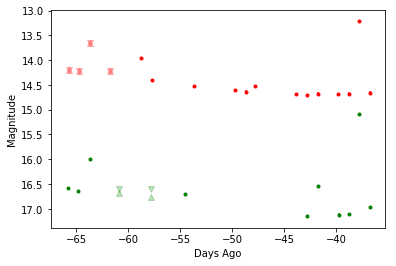

In [23]:
plot_dc_lightcurve(dflc)

In [24]:
dflc

,aimage,aimagerat,bimage,bimagerat,candid,chinr,chipsf,classtar,clrcoeff,clrcounc,...,difference_sigflux,dc_flux,dc_sigflux,dc_mag,dc_sigmag,difference_fluxlim,dc_flux_ulim,dc_flux_llim,dc_mag_ulim,dc_mag_llim
0,0.998,0.174476,0.931,0.162762,7.392608e+17,0.744,332.435577,0.987,0.100796,0.000005,...,848.364348,39888.475766,1231.673852,14.659016,0.033524,175.426975,60765.333685,60414.479735,14.201995,14.208282
1,1.495,0.535842,1.272,0.455914,7.102434e+17,0.439,2.326950,0.843,-0.097147,0.000013,...,105.099196,7506.648700,32.615528,16.587885,0.004717,223.851664,7003.389733,6555.686405,16.663230,16.734955
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.106160,0.000005,...,NaN,NaN,NaN,NaN,NaN,198.573014,60788.426503,60391.280476,14.190848,14.197965
3,1.789,0.764530,1.510,0.645299,7.112353e+17,0.439,3.663970,0.717,-0.110586,0.000016,...,104.868502,7405.287483,31.864312,16.644445,0.004672,263.876340,7043.414409,6515.661729,16.698842,16.783404
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.083136,0.000005,...,NaN,NaN,NaN,NaN,NaN,243.736273,60833.589763,60346.117217,14.218942,14.227677
5,0.749,0.318723,0.546,0.232340,7.123000e+17,0.439,3.043170,0.848,-0.043134,0.000014,...,73.642643,7219.282067,124.118118,15.989564,0.018666,168.717403,6948.255472,6610.820666,16.031110,16.085161
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.097187,0.000007,...,NaN,NaN,NaN,NaN,NaN,236.091550,60825.945040,60353.761939,13.650278,13.658739
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.092626,0.000004,...,NaN,NaN,NaN,NaN,NaN,201.595104,60791.448594,60388.258386,14.213894,14.221119
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.054421,0.000011,...,NaN,NaN,NaN,NaN,NaN,237.465451,7017.003520,6542.072618,16.604422,16.680513
9,1.014,0.761164,0.974,0.731138,7.172563e+17,0.744,19.189501,0.998,0.101342,0.000018,...,482.076257,54771.497863,1014.738650,13.961814,0.020115,590.093136,61179.946625,59999.760354,13.841678,13.862827
